In [79]:
import pandas as pd
import numpy as np
import seaborn as sns

In [80]:
inputdir = "../../data/derived/"

In [81]:
#Import the data
data17 = pd.read_csv(inputdir + "chfs2017data.csv")
data15 = pd.read_csv(inputdir + "chfs2015data.csv")
data13 = pd.read_csv(inputdir + "chfs2013data.csv")
data11 = pd.read_csv(inputdir + "chfs2011data.csv")

In [82]:
data17.head()

,hhid,hhid_2011,hhid_2013,hhid_2015,hhid_2017,distance,stock_account_cash_balance,stock_account_cash_balance_scope,stock_numbers,stock_values,...,married,stock_account,health,own_house,happiness,rural_household_registration,credit_constraints,financial_literacy,risk_preference,business_insurances
0,2017000001,.,.,.,2017000001,1,NaN,NaN,NaN,NaN,...,1,0.0,3.0,1,1.0,1,0,1.0,1.0,0.0
1,2017000001,.,.,.,2017000001,1,NaN,NaN,NaN,NaN,...,1,0.0,3.0,1,1.0,1,0,1.0,1.0,0.0
2,2013013417,.,2013013417,2015018254,2017000002,NaN,NaN,NaN,NaN,NaN,...,0,0.0,2.0,1,0.0,0,0,NaN,NaN,0.0
3,2013013417,.,2013013417,2015018254,2017000002,NaN,NaN,NaN,NaN,NaN,...,1,0.0,1.0,1,0.0,0,0,NaN,NaN,0.0
4,2013013417,.,2013013417,2015018254,2017000002,NaN,NaN,NaN,NaN,NaN,...,1,0.0,2.0,1,0.0,0,0,NaN,NaN,0.0


# Data cleaning

<AxesSubplot:>

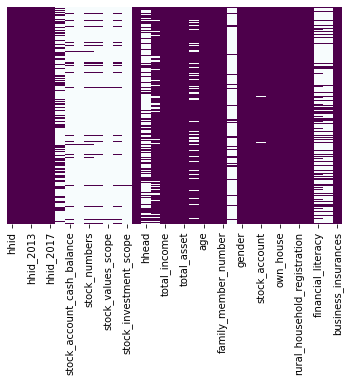

In [83]:
#Data visualization for the missing values
sns.heatmap(data17.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

In [84]:
data17.isna().sum()

hhid                                     0
hhid_2011                                0
hhid_2013                                0
hhid_2015                                0
hhid_2017                                0
distance                             82002
stock_account_cash_balance          117596
stock_account_cash_balance_scope    125547
stock_numbers                       117596
stock_values                        120378
stock_values_scope                  126087
stock_investment                    120378
stock_investment_scope              126351
pline                                    0
hhead                                87001
education_level                      17948
total_income                             0
total_consump                            0
total_asset                              0
total_debt                           18867
age                                     47
age2                                    47
family_member_number                    11
siblings   

**Deal with missing values of stock-related variables**

In [85]:
data17["stock_account_cash_balance"] = np.where(data17["stock_account"] == 0, 0, data17["stock_account_cash_balance"])
data17["stock_numbers"] = np.where(data17["stock_account"] == 0, 0, data17["stock_numbers"])
data17["stock_values"] = np.where(data17["stock_account"] == 0, 0, data17["stock_values"])
data17["stock_investment"] = np.where(data17["stock_account"] == 0, 0, data17["stock_investment"])

In [86]:
data17["stock_account_cash_balance"] = np.where((data17["stock_account_cash_balance"] == ".d") | 
                                                (data17["stock_account_cash_balance"] == ".r") |
                                                (data17["stock_account_cash_balance"] == ".n"),
                                                ".", data17["stock_account_cash_balance"])
data17["stock_account_cash_balance"] = np.where(data17["stock_account_cash_balance"] == ".", -1, 
                                                data17["stock_account_cash_balance"])
data17["stock_account_cash_balance"] = data17["stock_account_cash_balance"].astype(float)

In [87]:
data17["stock_account_cash_balance_scope"] = np.where(data17["stock_account_cash_balance"] == 0,
                                                     0, data17["stock_account_cash_balance_scope"])
data17["stock_account_cash_balance_scope"] = np.where((data17["stock_account_cash_balance"] > 0) & 
                                                      (data17["stock_account_cash_balance"] < 10000),
                                                     1, data17["stock_account_cash_balance_scope"])
data17["stock_account_cash_balance_scope"] = np.where((data17["stock_account_cash_balance"] >= 10000) & 
                                                      (data17["stock_account_cash_balance"] < 30000),
                                                     2, data17["stock_account_cash_balance_scope"])
data17["stock_account_cash_balance_scope"] = np.where((data17["stock_account_cash_balance"] >= 30000) & 
                                                      (data17["stock_account_cash_balance"] < 50000),
                                                     3, data17["stock_account_cash_balance_scope"])
data17["stock_account_cash_balance_scope"] = np.where((data17["stock_account_cash_balance"] >= 50000) & 
                                                      (data17["stock_account_cash_balance"] < 70000),
                                                     4, data17["stock_account_cash_balance_scope"])
data17["stock_account_cash_balance_scope"] = np.where((data17["stock_account_cash_balance"] >= 70000) & 
                                                      (data17["stock_account_cash_balance"] < 100000),
                                                     5, data17["stock_account_cash_balance_scope"])
data17["stock_account_cash_balance_scope"] = np.where((data17["stock_account_cash_balance"] >= 100000) & 
                                                      (data17["stock_account_cash_balance"] < 300000),
                                                     6, data17["stock_account_cash_balance_scope"])
data17["stock_account_cash_balance_scope"] = np.where((data17["stock_account_cash_balance"] >= 300000) & 
                                                      (data17["stock_account_cash_balance"] < 500000),
                                                     7, data17["stock_account_cash_balance_scope"])
data17["stock_account_cash_balance_scope"] = np.where((data17["stock_account_cash_balance"] >= 500000) & 
                                                      (data17["stock_account_cash_balance"] < 1000000),
                                                     8, data17["stock_account_cash_balance_scope"])
data17["stock_account_cash_balance_scope"] = np.where((data17["stock_account_cash_balance"] >= 1000000) & 
                                                      (data17["stock_account_cash_balance"] < 5000000),
                                                     9, data17["stock_account_cash_balance_scope"])
data17["stock_account_cash_balance_scope"] = np.where((data17["stock_account_cash_balance"] >= 5000000) & 
                                                      (data17["stock_account_cash_balance"] < 10000000),
                                                     10, data17["stock_account_cash_balance_scope"])
data17["stock_account_cash_balance_scope"] = np.where(data17["stock_account_cash_balance"] >= 10000000,
                                                     11, data17["stock_account_cash_balance_scope"])

In [88]:
data17["stock_values"] = np.where((data17["stock_values"] == ".d") | 
                                  (data17["stock_values"] == ".r") |
                                  (data17["stock_values"] == ".n"), 
                                  ".", data17["stock_values"])
data17["stock_values"] = np.where(data17["stock_values"] == ".", -1, data17["stock_values"])
data17["stock_values"] = data17["stock_values"].astype(float)

In [89]:
data17["stock_values_scope"] = np.where(data17["stock_values"] == 0, 
                                        0, data17["stock_values_scope"])
data17["stock_values_scope"] = np.where((data17["stock_values"] >= 0) & 
                                        (data17["stock_values"] < 10000), 
                                        1, data17["stock_values_scope"])
data17["stock_values_scope"] = np.where((data17["stock_values"] >= 10000) & 
                                        (data17["stock_values"] < 30000),
                                        2, data17["stock_values_scope"])
data17["stock_values_scope"] = np.where((data17["stock_values"] >= 30000) & 
                                        (data17["stock_values"] < 50000),
                                        3, data17["stock_values_scope"])
data17["stock_values_scope"] = np.where((data17["stock_values"] >= 50000) & 
                                        (data17["stock_values"] < 70000),
                                        4, data17["stock_values_scope"])
data17["stock_values_scope"] = np.where((data17["stock_values"] >= 70000) & 
                                        (data17["stock_values"] < 100000),
                                        5, data17["stock_values_scope"])
data17["stock_values_scope"] = np.where((data17["stock_values"] >= 100000) & 
                                        (data17["stock_values"] < 300000),
                                        6, data17["stock_values_scope"])
data17["stock_values_scope"] = np.where((data17["stock_values"] >= 300000) & 
                                        (data17["stock_values"] < 500000),
                                        7, data17["stock_values_scope"])
data17["stock_values_scope"] = np.where((data17["stock_values"] >= 500000) & 
                                        (data17["stock_values"] < 1000000),
                                        8, data17["stock_values_scope"])
data17["stock_values_scope"] = np.where((data17["stock_values"] >= 1000000) & 
                                        (data17["stock_values"] < 5000000),
                                        9, data17["stock_values_scope"])
data17["stock_values_scope"] = np.where((data17["stock_values"] >= 5000000) & 
                                        (data17["stock_values"] < 10000000),
                                        10, data17["stock_values_scope"])
data17["stock_values_scope"] = np.where(data17["stock_values"] >= 10000000,
                                        11, data17["stock_values_scope"])

In [90]:
data17["stock_investment"] = np.where((data17["stock_investment"] == ".d") | 
                                      (data17["stock_investment"] == ".r") |
                                      (data17["stock_investment"] == ".n"), 
                                      ".", data17["stock_investment"])
data17["stock_investment"] = np.where(data17["stock_investment"] == ".", -1, data17["stock_investment"])
data17["stock_investment"] = data17["stock_investment"].astype(float)

In [91]:
data17["stock_investment_scope"] = np.where(data17["stock_investment"] == 0, 
                                            0, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 0) & 
                                            (data17["stock_investment"] < 10000), 
                                            1, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 10000) & 
                                            (data17["stock_investment"] < 30000),
                                            2, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 30000) & 
                                            (data17["stock_investment"] < 50000),
                                            3, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 50000) & 
                                            (data17["stock_investment"] < 70000),
                                            4, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 70000) & 
                                            (data17["stock_investment"] < 100000),
                                            5, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 100000) & 
                                            (data17["stock_investment"] < 300000),
                                            6, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 300000) & 
                                            (data17["stock_investment"] < 500000),
                                            7, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 500000) & 
                                            (data17["stock_investment"] < 1000000),
                                            8, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 1000000) & 
                                            (data17["stock_investment"] < 5000000),
                                            9, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 5000000) & 
                                            (data17["stock_investment"] < 10000000),
                                            10, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where(data17["stock_investment"] >= 10000000,
                                            11, data17["stock_investment_scope"])

In [92]:
#Delete unneeded variables
del data17["stock_account_cash_balance"]
del data17["stock_values"]
del data17["stock_investment"]

In [93]:
#Rename the following variables
data17. rename(columns = {'stock_account_cash_balance_scope':'stock_account_cash_balance', 
                          'stock_values_scope':'stock_values',
                          'stock_investment_scope':'stock_investment'}, inplace = True)

In [94]:
#Since my research question is focused on the household level, I only need one data per household.
#That is, the data of the head of the household.
data17 = data17.dropna(subset = ['hhead'])
del data17['hhead']

In [95]:
data15.head()

,hhid_2015,financial_literacy_2015,risk_preference_2015
0,2015000001,1.0,0.0
1,2015000002,3.0,2.0
2,2015000003,1.0,0.0
3,2015000004,3.0,4.0
4,2015000005,0.0,0.0


In [96]:
data13.head()

,hhid_2013,financial_literacy_2013,risk_preference_2013
0,2013000001,1.0,1.0
1,2013000002,2.0,1.0
2,2013000003,2.0,0.0
3,2013000004,3.0,0.0
4,2013000005,2.0,2.0


In [97]:
data11.head()

,hhid_2011,risk_preference_2011
0,201100001,0.0
1,201100002,0.0
2,201100003,0.0
3,201100004,0.0
4,201100005,0.0


In [98]:
data17['hhid_2015'] = np.where(data17["hhid_2015"] == ".", -1, data17["hhid_2015"])
data17['hhid_2013'] = np.where(data17["hhid_2013"] == ".", -1, data17["hhid_2013"])
data17['hhid_2011'] = np.where(data17["hhid_2011"] == ".", -1, data17["hhid_2011"])
data17['hhid_2015'] = data17['hhid_2015'].astype(int)
data17['hhid_2013'] = data17['hhid_2013'].astype(int)
data17['hhid_2011'] = data17['hhid_2011'].astype(int)

You can observe a large number of missing values in `financial_literacy` and `risk_preference` in data17 because only new respondents were interviewed in these two related questions in the 2017 survey. Therefore, I need to merge the previous data and fill in the missing values.

In [99]:
data1 = pd.merge(data17, data15, on = 'hhid_2015', how = 'outer')
data2 = pd.merge(data1, data13, on = 'hhid_2013', how = 'outer')
data = pd.merge(data2, data11, on = 'hhid_2011', how = 'outer')
#The merge method I used produces a lot of na values, remove them.
data = data.dropna(subset = ['hhid'])
#The merge method I used also produces a lot of duplicate values, so I need to remove these duplicates.
data = data.drop_duplicates(subset = ['hhid'], keep = 'first')

In [100]:
data['financial_literacy'] = np.where(data["financial_literacy"].isnull() == True, 
                                      data["financial_literacy_2015"], data["financial_literacy"])
data['financial_literacy'] = np.where(data["financial_literacy"].isnull() == True, 
                                      data["financial_literacy_2013"], data["financial_literacy"])

In [101]:
data['risk_preference'] = np.where(data["risk_preference"].isnull() == True, data["risk_preference_2015"], 
                                   data["risk_preference"])
data['risk_preference'] = np.where(data["risk_preference"].isnull() == True, data["risk_preference_2013"], 
                                   data["risk_preference"])
data['risk_preference'] = np.where(data["risk_preference"].isnull() == True, data["risk_preference_2011"], 
                                   data["risk_preference"])

In [102]:
#Delete unneeded variables
del data["hhid_2017"]
del data["hhid_2015"]
del data["hhid_2013"]
del data["hhid_2011"]
del data["financial_literacy_2015"]
del data["financial_literacy_2013"]
del data["risk_preference_2015"]
del data["risk_preference_2013"]
del data["risk_preference_2011"]
del data["siblings"]
del data["business_insurances"]

In [103]:
data.isna().sum()

hhid                                0
distance                        27321
stock_account_cash_balance        369
stock_numbers                     360
stock_values                     1263
stock_investment                 1264
pline                               0
education_level                    53
total_income                        0
total_consump                       0
total_asset                         0
total_debt                       8337
age                                11
age2                               11
family_member_number                3
gender                              1
married                             0
stock_account                      98
health                              9
own_house                           0
happiness                         458
rural_household_registration        0
credit_constraints                  0
financial_literacy                 46
risk_preference                  3692
dtype: int64

In [104]:
#Since my research question is focused on rural households, I do not need data related to urban households.
rural_data = data.drop(data[data['rural_household_registration'] == 0].index)
del rural_data['rural_household_registration']

<AxesSubplot:>

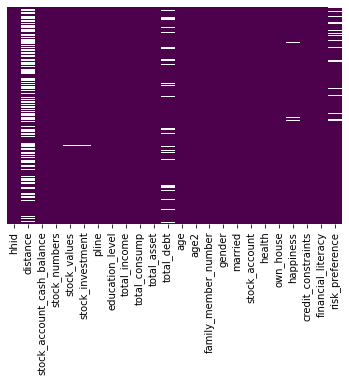

In [105]:
#Data visualization for the missing values
sns.heatmap(rural_data.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

In [106]:
rural_data.isna().sum()

hhid                             0
distance                      9104
stock_account_cash_balance      99
stock_numbers                   99
stock_values                   232
stock_investment               232
pline                            0
education_level                 25
total_income                     0
total_consump                    0
total_asset                      0
total_debt                    3172
age                              6
age2                             6
family_member_number             2
gender                           0
married                          0
stock_account                   53
health                           3
own_house                        0
happiness                      313
credit_constraints               0
financial_literacy              32
risk_preference               2257
dtype: int64

In [107]:
rural_data['stock_account_cash_balance'].value_counts()

0     20663
1        42
2        37
4        29
6        29
.d       18
3        15
2        12
1        10
7         7
5         6
3         5
6         4
8         3
9         3
4         3
.r        3
5         1
Name: stock_account_cash_balance, dtype: int64

In [108]:
rural_data = rural_data.drop(rural_data[(rural_data['stock_account_cash_balance'] == '.d') | 
                                       (rural_data['stock_account_cash_balance'] == '.r')].index)

In [109]:
rural_data['stock_numbers'].value_counts()

0      20556
0         77
1         60
2         45
.d        40
3         37
4         20
5         17
6          4
8          3
13         2
30         1
12         1
300        1
999        1
100        1
700        1
7          1
15         1
Name: stock_numbers, dtype: int64

In [110]:
rural_data = rural_data.drop(rural_data[rural_data['stock_numbers'] == '.d'].index)

In [111]:
#Continue processing those missing values
rural_data['stock_account_cash_balance'] = rural_data['stock_account_cash_balance'].fillna(rural_data['stock_account_cash_balance'].median())
rural_data['stock_numbers'] = rural_data['stock_numbers'].fillna(rural_data['stock_numbers'].median())
rural_data['stock_account'] = rural_data['stock_account'].fillna(rural_data['stock_account'].median())
rural_data['education_level'] = rural_data['education_level'].fillna(rural_data['education_level'].median())
rural_data['health'] = rural_data['health'].fillna(rural_data['health'].median())
rural_data['family_member_number'] = rural_data['family_member_number'].fillna(rural_data['family_member_number'].median())
rural_data['age'] = rural_data['age'].fillna(rural_data['age'].mean())
del rural_data['age2']
rural_data['age2'] = rural_data['age']*rural_data['age']
rural_data['financial_literacy'] = rural_data['financial_literacy'].fillna(rural_data['financial_literacy'].median())

In [112]:
#Delete rows with too many missing values
rural_data = rural_data.dropna(subset = ['distance'])
rural_data = rural_data.dropna(subset = ['total_debt'])
rural_data = rural_data.dropna(subset = ['risk_preference'])
rural_data = rural_data.dropna(subset = ['happiness'])

In [113]:
rural_data.isna().sum()

hhid                           0
distance                       0
stock_account_cash_balance     0
stock_numbers                  0
stock_values                  40
stock_investment              40
pline                          0
education_level                0
total_income                   0
total_consump                  0
total_asset                    0
total_debt                     0
age                            0
family_member_number           0
gender                         0
married                        0
stock_account                  0
health                         0
own_house                      0
happiness                      0
credit_constraints             0
financial_literacy             0
risk_preference                0
age2                           0
dtype: int64

In [114]:
#The following variables contain `.d` in their values, remove them
rural_data = rural_data.drop(rural_data[rural_data['stock_values'] == '.d'].index)
rural_data = rural_data.drop(rural_data[rural_data['stock_investment'] == '.d'].index)

In [115]:
#The following variables have fewer missing values and thus use the median to fill in the missing values
rural_data['stock_values'] = rural_data['stock_values'].fillna(rural_data['stock_values'].median())
rural_data['stock_investment'] = rural_data['stock_investment'].fillna(rural_data['stock_investment'].median())
rural_data['stock_numbers'] = rural_data['stock_numbers'].fillna(rural_data['stock_numbers'].median())
rural_data['stock_account'] = rural_data['stock_account'].fillna(rural_data['stock_account'].median())

<AxesSubplot:>

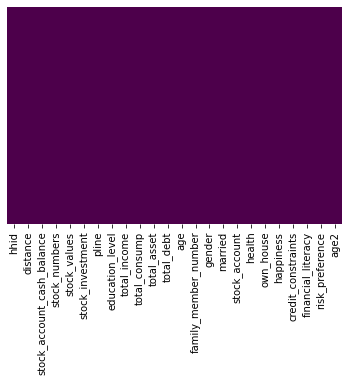

In [116]:
#All missing values have been processed
sns.heatmap(rural_data.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

In [117]:
rural_data.describe()

,hhid,pline,education_level,total_income,total_consump,total_asset,total_debt,age,family_member_number,gender,married,stock_account,health,own_house,happiness,credit_constraints,financial_literacy,risk_preference,age2
count,8.891000e+03,8891.000000,8891.000000,8.891000e+03,8.891000e+03,8.891000e+03,8.891000e+03,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.00000,8891.000000,8891.000000
mean,1.693939e+09,1.617366,2.565066,5.666513e+04,4.359626e+04,4.021093e+05,3.876970e+04,54.925113,4.507479,0.088067,0.905635,0.004386,2.200540,0.967383,0.696772,0.122034,0.88314,0.951412,3146.434106
std,6.916228e+08,1.165413,0.938437,1.299758e+05,4.977138e+04,1.034757e+06,1.533667e+05,11.387744,2.653229,0.283408,0.292352,0.066089,1.050333,0.177643,0.459679,0.327343,1.07270,1.211355,1268.367343
min,2.011006e+08,1.000000,1.000000,-1.699793e+06,7.368000e+02,-2.124020e+05,0.000000e+00,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,16.000000
25%,2.013005e+09,1.000000,2.000000,1.156705e+04,1.819150e+04,6.354200e+04,0.000000e+00,47.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,2209.000000
50%,2.013022e+09,1.000000,3.000000,3.261403e+04,3.152200e+04,1.915540e+05,0.000000e+00,54.000000,4.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.00000,1.000000,2916.000000
75%,2.015020e+09,2.000000,3.000000,6.752000e+04,5.342750e+04,4.284725e+05,3.000000e+04,63.000000,6.000000,0.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.00000,2.000000,3969.000000
max,2.017040e+09,16.000000,8.000000,5.001535e+06,1.593396e+06,5.622800e+07,7.277052e+06,117.000000,29.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,4.00000,5.000000,13689.000000


In [118]:
len(rural_data)

8891

In [119]:
#Export data
rural_data.to_csv(inputdir + 'processed_chfs_data.csv', index=False)